In [19]:
import cv2
from PIL import Image
from ultralytics import YOLO
from matplotlib import pyplot as plt
from dataclasses import dataclass
import numpy as np


model = YOLO("models/yolo26s.pt")

In [2]:
# from PIL
im1 = Image.open("Inputs/bridge_cars.jpg")
results = model.predict(source=im1, save=True, show=True)  # save plotted images

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()
The DISPLAY environment variable isn't set.

0: 640x480 1 car, 1 train, 297.7ms
Speed: 28.3ms preprocess, 297.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /home/timoshyd/industry_tests/test_suite_car_track/runs/detect/predict18


In [3]:
# Print the im1 dimensions:
print(f"Image 1 dimensions: {im1.size}")


print(type(results))
print(len(results))
print(dir(results[0]))
print(results[0])

Image 1 dimensions: (960, 1280)
<class 'list'>
1
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_keys', 'boxes', 'cpu', 'cuda', 'keypoints', 'masks', 'names', 'new', 'numpy', 'obb', 'orig_img', 'orig_shape', 'path', 'plot', 'probs', 'save', 'save_crop', 'save_dir', 'save_txt', 'show', 'speed', 'summary', 'to', 'to_csv', 'to_df', 'to_json', 'update', 'verbose']
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire 

In [4]:
print("-" * 38)
print("boxes")
print(results[0].boxes)
print(results[0].cla)
print("-" * 38)

--------------------------------------
boxes
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2., 6.])
conf: tensor([0.7385, 0.4204])
data: tensor([[6.4520e+02, 7.3403e+02, 7.6694e+02, 8.0233e+02, 7.3850e-01, 2.0000e+00],
        [2.7856e+02, 6.6428e+02, 5.8959e+02, 7.5258e+02, 4.2042e-01, 6.0000e+00]])
id: None
is_track: False
orig_shape: (1280, 960)
shape: torch.Size([2, 6])
xywh: tensor([[706.0687, 768.1785, 121.7375,  68.2996],
        [434.0789, 708.4292, 311.0301,  88.3017]])
xywhn: tensor([[0.7355, 0.6001, 0.1268, 0.0534],
        [0.4522, 0.5535, 0.3240, 0.0690]])
xyxy: tensor([[645.2000, 734.0287, 766.9374, 802.3283],
        [278.5638, 664.2784, 589.5939, 752.5801]])
xyxyn: tensor([[0.6721, 0.5735, 0.7989, 0.6268],
        [0.2902, 0.5190, 0.6142, 0.5880]])
--------------------------------------


(960, 1280)


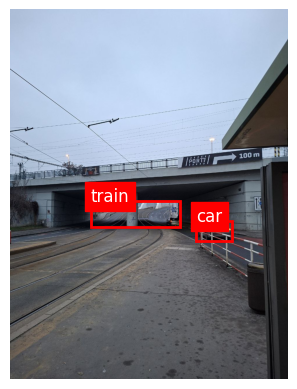

In [17]:
print(im1.size)
# Plot only image and boxes using matplotlib
plt.imshow(im1)
for box in results[0].boxes:
    x1, y1, x2, y2 = box.xyxy[0]
    width, height = x2 - x1, y2 - y1
    rect = plt.Rectangle((x1, y1), width, height, fill=False, color='red', linewidth=2)
    plt.gca().add_patch(rect)
    # Plot class label
    cls = int(box.cls[0])
    plt.text(x1, y1, results[0].names[cls], color='white', fontsize=12, backgroundcolor='red')
plt.axis('off')  # Hide axis
plt.show()

In [10]:
results[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [22]:
cap = cv2.VideoCapture("Inputs/video.mp4")

frame_iter = 0
while cap.isOpened():
    ret, frame = cap.read()
    frame_iter += 1
    if frame_iter % 30 == 0:
        print(f"Frame {frame_iter}")
    if not ret:
        break

# Print total number of frames
print(f"Total number of frames: {frame_iter}")
# Print the rate of frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Frames per second: {fps}")


Frame 30
Frame 60
Frame 90
Frame 120
Frame 150
Frame 180
Frame 210
Frame 240
Frame 270
Frame 300
Frame 330
Frame 360
Frame 390
Frame 420
Total number of frames: 422
Frames per second: 30.0044899830616


In [23]:
@dataclass
class Detection:
    bbox: np.ndarray  # [x1, y1, x2, y2]
    conf: float
    cls: int

class TrackedObject:
    _next_id = 0

    def __init__(self, detection: Detection):
        self.id = TrackedObject._next_id
        TrackedObject._next_id += 1

        self.bbox = detection.bbox
        self.cls = detection.cls
        self.conf = detection.conf

        self.age = 0              # total frames alive
        self.missed = 0           # frames since last match

    def predict(self):
        """
        For now: no motion model.
        Later: Kalman filter lives here.
        """
        return self.bbox

    def update(self, detection: Detection):
        self.bbox = detection.bbox
        self.conf = detection.conf
        self.missed = 0
        self.age += 1

    def mark_missed(self):
        self.missed += 1
        self.age += 1


In [ ]:
def iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    inter = max(0, xB - xA) * max(0, yB - yA)
    areaA = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    areaB = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    union = areaA + areaB - inter
    return inter / union if union > 0 else 0


In [25]:
def associate_detections(tracked_objects, detections, iou_threshold=0.3):
    matches = []
    unmatched_tracks = set(range(len(tracked_objects)))
    unmatched_dets = set(range(len(detections)))

    for t_idx, track in enumerate(tracked_objects):
        best_iou = 0
        best_d = None

        for d_idx in unmatched_dets:
            score = iou(track.predict(), detections[d_idx].bbox)
            if score > best_iou:
                best_iou = score
                best_d = d_idx

        if best_iou > iou_threshold:
            matches.append((t_idx, best_d))
            unmatched_tracks.remove(t_idx)
            unmatched_dets.remove(best_d)

    return matches, unmatched_tracks, unmatched_dets

In [31]:
cap = cv2.VideoCapture("Inputs/video.mp4")

fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f'Video FPS: {fps:.2f}, Width: {width}, Height: {height}')


writer = cv2.VideoWriter(
    "Outputs/tracked_output.mp4",
    cv2.VideoWriter_fourcc(*"mp4v"),
    fps,
    (width, height)
)

tracked_objects = []
MAX_MISSED = 10

Video FPS: 30.00, Width: 720, Height: 1280


In [ ]:
frame_idx = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model.predict(frame, conf=0.3, verbose=False)[0]

    detections = []
    if results.boxes is not None:
        for box, cls, conf in zip(
            results.boxes.xyxy.cpu().numpy(),
            results.boxes.cls.cpu().numpy(),
            results.boxes.conf.cpu().numpy(),
        ):
            if results.names[int(cls)] == "car":
                detections.append(
                    Detection(bbox=box, conf=conf, cls=int(cls))
                )

    # --- association ---
    matches, unmatched_tracks, unmatched_dets = associate_detections(
        tracked_objects, detections
    )

    # update matched tracks
    for t_idx, d_idx in matches:
        tracked_objects[t_idx].update(detections[d_idx])

    # mark missed tracks
    for t_idx in unmatched_tracks:
        tracked_objects[t_idx].mark_missed()

    # create new tracks
    for d_idx in unmatched_dets:
        tracked_objects.append(TrackedObject(detections[d_idx]))

    # remove dead tracks
    tracked_objects = [
        t for t in tracked_objects if t.missed <= MAX_MISSED
    ]

    if frame_idx % 10 == 0:
        print(f'Frame {frame_idx}: {len(tracked_objects)} active tracks')
        # Print number of matches, unmatched tracks, unmatched detections
        print(f'  Matches: {len(matches)}, Unmatched Tracks: {len(unmatched_tracks)}, Unmatched Detections: {len(unmatched_dets)}')

    # --- draw ---
    for obj in tracked_objects:
        x1, y1, x2, y2 = map(int, obj.bbox)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(
            frame,
            f"ID {obj.id}",
            (x1, y1 - 5),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (0, 255, 0),
            2,
        )

    writer.write(frame)
    frame_idx += 1

cap.release()
writer.release()
